# DEG Comparison (Trans Effects)

Compare trans-effects (genome-wide DEG) results across datasets:
- Number of DEGs per guide
- Number of DEGs for positive controls
- Effect sizes for positive control DEGs

**Input:** `latest_qc_paths.tsv`  
**Output:** Combined trans results and comparison plots

In [1]:
import os
import sys
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [2]:
# Project root
PROJECT_ROOT = Path("/Users/adamklie/Desktop/projects/tf_perturb_seq")

# Add config to path for color loader
sys.path.append(str(PROJECT_ROOT / "config"))
from loader import load_colors

dataset_colors = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_colors")
dataset_order = load_colors("technology-benchmark_WTC11_TF-Perturb-seq", "dataset_order")

In [3]:
# Paths
BASE_DIR = PROJECT_ROOT / "datasets" / "technology-benchmark_WTC11_TF-Perturb-seq"
QC_PATHS_FILE = BASE_DIR / "latest_qc_paths.tsv"
OUTPUT_DIR = BASE_DIR / "results" / "cross_tech_comparison"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Reading paths from: {QC_PATHS_FILE}")
print(f"Output directory: {OUTPUT_DIR}")

Reading paths from: /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/latest_qc_paths.tsv
Output directory: /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison


In [4]:
# Load the paths manifest
paths_df = pd.read_csv(QC_PATHS_FILE, sep="\t")
paths_df

,dataset,qc_dir,gene_metrics,guide_metrics,intended_target_results,intended_target_metrics,trans_results,trans_metrics
0,Hon_WTC11-benchmark_TF-Perturb-seq,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Hon_WTC11-benchmark_gene_metrics.tsv,mapping_guide/Hon_WTC11-benchmark_guide_metric...,intended_target/Hon_WTC11-benchmark_intended_t...,intended_target/Hon_WTC11-benchmark_intended_t...,trans/Hon_WTC11-benchmark_trans_results.tsv,trans/Hon_WTC11-benchmark_trans_metrics.tsv
1,Huangfu_WTC11-benchmark_TF-Perturb-seq,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Huangfu_WTC11-benchmark_TF-Pertur...,mapping_guide/Huangfu_WTC11-benchmark_TF-Pertu...,intended_target/Huangfu_WTC11-benchmark_TF-Per...,intended_target/Huangfu_WTC11-benchmark_TF-Per...,trans/Huangfu_WTC11-benchmark_TF-Perturb-seq_t...,trans/Huangfu_WTC11-benchmark_TF-Perturb-seq_t...
2,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Gersbach_WTC11-benchmark_TF-Pertu...,mapping_guide/Gersbach_WTC11-benchmark_TF-Pert...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...
3,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,/Users/adamklie/Desktop/projects/tf_perturb_se...,mapping_gene/Gersbach_WTC11-benchmark_TF-Pertu...,mapping_guide/Gersbach_WTC11-benchmark_TF-Pert...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,intended_target/Gersbach_WTC11-benchmark_TF-Pe...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...,trans/Gersbach_WTC11-benchmark_TF-Perturb-seq_...


## Trans Metrics Overview

In [5]:
# Load trans metrics
trans_metrics_list = []
for _, row in paths_df.iterrows():
    metrics_path = Path(row['qc_dir']) / row['trans_metrics']
    if metrics_path.exists():
        df = pd.read_csv(metrics_path, sep="\t")
        df['dataset'] = row['dataset']
        trans_metrics_list.append(df)
    else:
        print(f"Warning: {metrics_path} not found")

trans_metrics_df = pd.concat(trans_metrics_list, ignore_index=True)
trans_metrics_df['dataset'] = pd.Categorical(trans_metrics_df['dataset'], categories=dataset_order, ordered=True)
trans_metrics_df = trans_metrics_df.sort_values('dataset')
trans_metrics_df

,n_guides_tested,n_targeting_guides,n_non_targeting_guides,median_significant_per_guide_targeting,mean_significant_per_guide_targeting,median_significant_per_guide_nt,mean_significant_per_guide_nt,total_significant_tests,median_genome_log2fc_targeting,median_genome_log2fc_nt,fdr_method,auroc,auprc,n_validated_links,n_eval_positives,n_eval_negatives,dataset
0,416,386,30,83.0,242.453368,71.0,288.200000,102233,-0.012362,-0.012164,fdr_bh,NaN,NaN,0,0,0,Hon_WTC11-benchmark_TF-Perturb-seq
1,416,386,30,78.0,211.621762,58.0,127.300000,85505,-0.021216,-0.018564,fdr_bh,NaN,NaN,0,0,0,Huangfu_WTC11-benchmark_TF-Perturb-seq
2,416,386,30,98.5,205.520725,94.0,181.466667,84775,-0.013245,-0.011252,fdr_bh,NaN,NaN,0,0,0,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3
3,416,386,30,15.5,84.264249,23.0,79.400000,34908,-0.011004,-0.007432,fdr_bh,NaN,NaN,0,0,0,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2


In [6]:
# Save combined trans metrics
trans_metrics_df.to_csv(OUTPUT_DIR / "combined_trans_metrics.tsv", sep="\t", index=False)
print(f"Saved to {OUTPUT_DIR / 'combined_trans_metrics.tsv'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/combined_trans_metrics.tsv


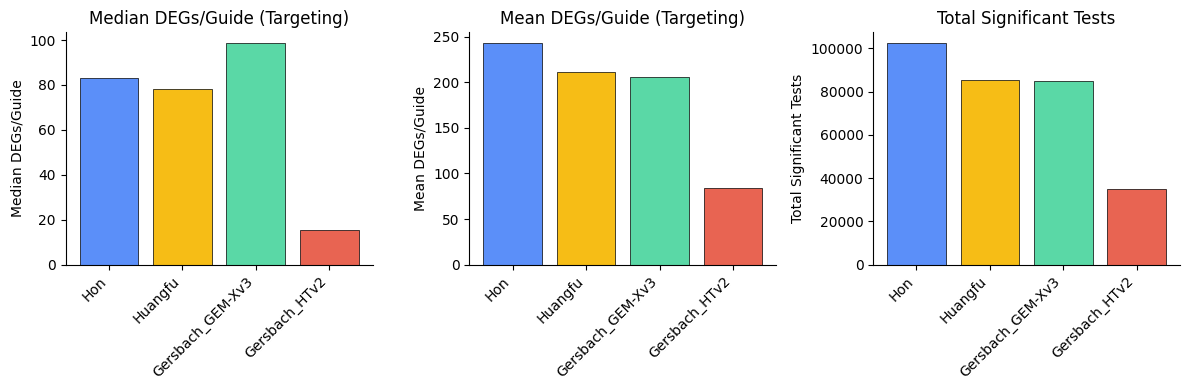

In [7]:
# Trans metrics barplots
metrics_to_plot = [
    ('median_significant_per_guide_targeting', 'Median DEGs/Guide (Targeting)'),
    ('mean_significant_per_guide_targeting', 'Mean DEGs/Guide (Targeting)'),
    ('total_significant_tests', 'Total Significant Tests'),
]

fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(4 * len(metrics_to_plot), 4))

for ax, (col, title) in zip(axes, metrics_to_plot):
    colors = [dataset_colors.get(ds, 'gray') for ds in trans_metrics_df['dataset']]
    ax.bar(range(len(trans_metrics_df)), trans_metrics_df[col], color=colors, edgecolor='black', linewidth=0.5)
    ax.set_xticks(range(len(trans_metrics_df)))
    ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in trans_metrics_df['dataset']], 
                       rotation=45, ha='right')
    ax.set_ylabel(title.split('(')[0].strip())
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "trans_metrics_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Trans Results (Per-Guide DEGs)

In [8]:
# Load trans results (per-guide, per-gene)
trans_results_list = []
for _, row in paths_df.iterrows():
    results_path = Path(row['qc_dir']) / row['trans_results']
    if results_path.exists():
        df = pd.read_csv(results_path, sep="\t")
        df['dataset'] = row['dataset']
        trans_results_list.append(df)
    else:
        print(f"Warning: {results_path} not found")

trans_results_df = pd.concat(trans_results_list, ignore_index=True)
print(f"Loaded {len(trans_results_df):,} total trans test results")
trans_results_df.head()

/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/2682885924.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(results_path, sep="\t")
/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/2682885924.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(results_path, sep="\t")
/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/2682885924.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(results_path, sep="\t")
/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/2682885924.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(results_path, sep="\t")


Loaded 17,400,032 total trans test results


,guide_id,guide_target_id,guide_target_symbol,tested_gene_id,tested_gene_symbol,label,log2_fc,p_value,p_value_adj,significant,dataset
0,AFF4#chr5:132963540-132963558(+),ENSG00000072364,AFF4,ENSG00000230021,ENSG00000230021,tf_targeting,-0.178302,0.000862,0.037234,True,Hon_WTC11-benchmark_TF-Perturb-seq
1,AFF4#chr5:132963540-132963558(+),ENSG00000072364,AFF4,ENSG00000228794,LINC01128,tf_targeting,0.012941,0.951632,0.998302,False,Hon_WTC11-benchmark_TF-Perturb-seq
2,AFF4#chr5:132963540-132963558(+),ENSG00000072364,AFF4,ENSG00000188976,NOC2L,tf_targeting,-0.231359,0.021591,0.299176,False,Hon_WTC11-benchmark_TF-Perturb-seq
3,AFF4#chr5:132963540-132963558(+),ENSG00000072364,AFF4,ENSG00000187608,ISG15,tf_targeting,-0.017228,0.946507,0.998074,False,Hon_WTC11-benchmark_TF-Perturb-seq
4,AFF4#chr5:132963540-132963558(+),ENSG00000072364,AFF4,ENSG00000188157,AGRN,tf_targeting,-0.127155,0.440011,0.932741,False,Hon_WTC11-benchmark_TF-Perturb-seq


In [9]:
# Save combined trans results (this can be large)
trans_results_df.to_csv(OUTPUT_DIR / "combined_trans_results.tsv.gz", sep="\t", index=False, compression='gzip')
print(f"Saved to {OUTPUT_DIR / 'combined_trans_results.tsv.gz'}")

Saved to /Users/adamklie/Desktop/projects/tf_perturb_seq/datasets/technology-benchmark_WTC11_TF-Perturb-seq/results/cross_tech_comparison/combined_trans_results.tsv.gz


## DEGs per Guide Distribution

In [10]:
# Count significant DEGs per guide per dataset
degs_per_guide = trans_results_df.groupby(['dataset', 'guide_id', 'label'])['significant'].sum().reset_index()
degs_per_guide.columns = ['dataset', 'guide_id', 'label', 'n_degs']
degs_per_guide['dataset'] = pd.Categorical(degs_per_guide['dataset'], categories=dataset_order, ordered=True)
degs_per_guide.head()

,dataset,guide_id,label,n_degs
0,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,AFF4#chr5:132963540-132963558(+),tf_targeting,382
1,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,AFF4#chr5:132963567-132963585(+),tf_targeting,357
2,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,AFF4#chr5:132963570-132963588(+),tf_targeting,176
3,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,AFF4#chr5:132963573-132963591(+),tf_targeting,71
4,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,AFF4#chr5:132963579-132963597(-),tf_targeting,38


/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/1130446504.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/1130446504.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in dataset_order], rotation=45, ha='right')


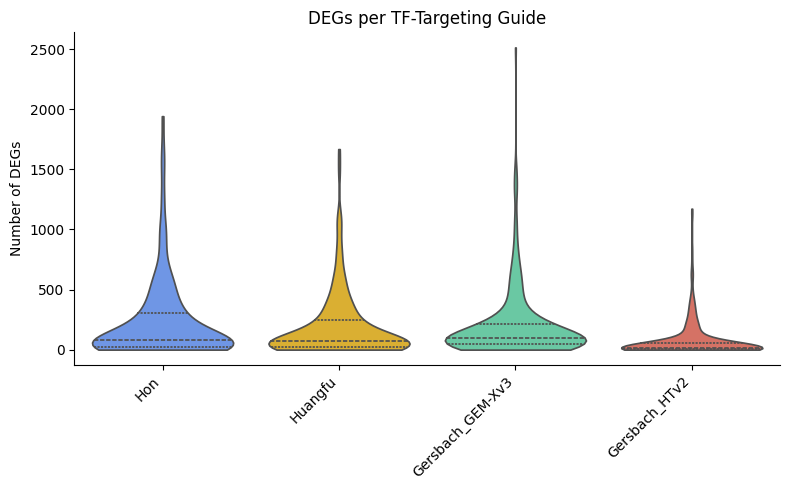

In [11]:
# Violin plot of DEGs per guide for TF-targeting guides
tf_degs = degs_per_guide[degs_per_guide['label'] == 'tf_targeting'].copy()

fig, ax = plt.subplots(figsize=(8, 5))
sns.violinplot(
    data=tf_degs,
    x='dataset',
    y='n_degs',
    order=dataset_order,
    palette=dataset_colors,
    inner='quartile',
    cut=0,
    ax=ax
)

ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in dataset_order], rotation=45, ha='right')
ax.set_ylabel('Number of DEGs')
ax.set_xlabel('')
ax.set_title('DEGs per TF-Targeting Guide')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "degs_per_guide_violin.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Positive Control DEG Analysis

In [12]:
# Get positive control results
posctrl_results = trans_results_df[trans_results_df['label'] == 'positive_control'].copy()
posctrl_results['dataset'] = pd.Categorical(posctrl_results['dataset'], categories=dataset_order, ordered=True)
print(f"Positive control trans results: {len(posctrl_results):,}")

Positive control trans results: 334,616


In [13]:
# Count DEGs per positive control guide
posctrl_degs = posctrl_results.groupby(['dataset', 'guide_id']).agg(
    n_degs=('significant', 'sum'),
    n_tests=('significant', 'count'),
    guide_target=('guide_target_symbol', 'first')
).reset_index()
posctrl_degs

/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/1702508517.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  posctrl_degs = posctrl_results.groupby(['dataset', 'guide_id']).agg(


,dataset,guide_id,n_degs,n_tests,guide_target
0,Hon_WTC11-benchmark_TF-Perturb-seq,CD151#strong,921,9397,CD151
1,Hon_WTC11-benchmark_TF-Perturb-seq,CD151#weak,1322,9397,CD151
2,Hon_WTC11-benchmark_TF-Perturb-seq,CD55#strong,1218,9397,CD55
3,Hon_WTC11-benchmark_TF-Perturb-seq,CD81#strong,1374,9397,CD81
4,Hon_WTC11-benchmark_TF-Perturb-seq,CD81#weak,601,9397,CD81
5,Hon_WTC11-benchmark_TF-Perturb-seq,NGFRAP1#A,1660,9397,NGFRAP1
6,Hon_WTC11-benchmark_TF-Perturb-seq,NGFRAP1#B,360,9397,NGFRAP1
7,Hon_WTC11-benchmark_TF-Perturb-seq,TFRC#A,458,9397,TFRC
8,Huangfu_WTC11-benchmark_TF-Perturb-seq,CD151#strong,1038,8974,CD151
9,Huangfu_WTC11-benchmark_TF-Perturb-seq,CD151#weak,582,8974,CD151


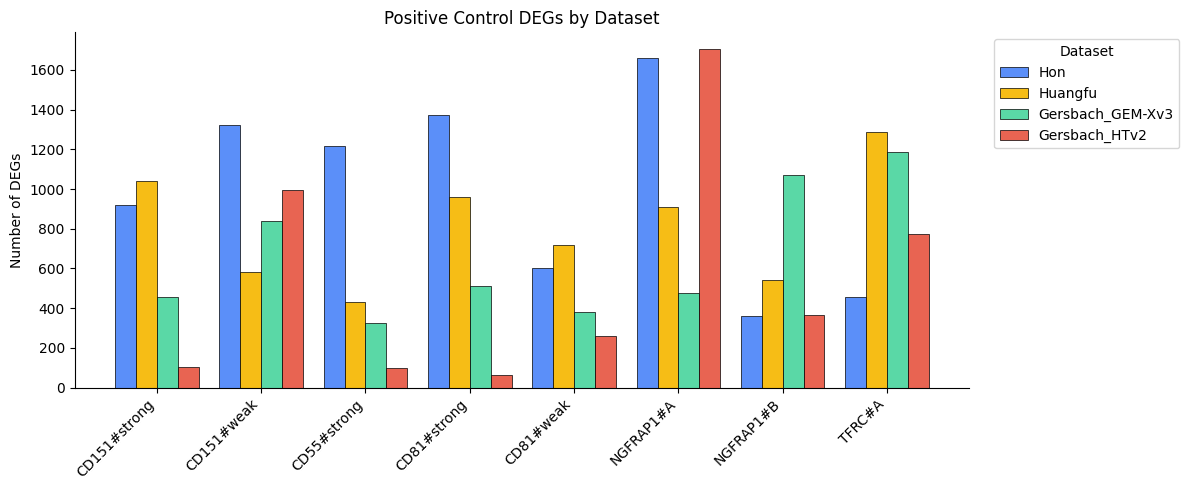

In [14]:
# Barplot of DEGs per positive control, grouped by dataset
fig, ax = plt.subplots(figsize=(12, 5))

# Create grouped barplot
posctrl_degs_pivot = posctrl_degs.pivot(index='guide_id', columns='dataset', values='n_degs')
posctrl_degs_pivot = posctrl_degs_pivot[dataset_order]  # Reorder columns

x = np.arange(len(posctrl_degs_pivot))
width = 0.2

for i, ds in enumerate(dataset_order):
    offset = (i - len(dataset_order)/2 + 0.5) * width
    ax.bar(x + offset, posctrl_degs_pivot[ds], width, 
           label=ds.replace('_WTC11-benchmark_TF-Perturb-seq', ''),
           color=dataset_colors.get(ds, 'gray'), edgecolor='black', linewidth=0.5)

ax.set_xticks(x)
ax.set_xticklabels(posctrl_degs_pivot.index, rotation=45, ha='right')
ax.set_ylabel('Number of DEGs')
ax.set_title('Positive Control DEGs by Dataset')
ax.legend(title='Dataset', bbox_to_anchor=(1.02, 1), loc='upper left')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "posctrl_degs_barplot.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Effect Sizes for Positive Control DEGs

In [15]:
# Get significant positive control DEGs
posctrl_sig = posctrl_results[posctrl_results['significant'] == True].copy()
print(f"Significant positive control DEGs: {len(posctrl_sig):,}")

Significant positive control DEGs: 23,992


/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/227589257.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/227589257.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in dataset_order], rotation=45, ha='right')


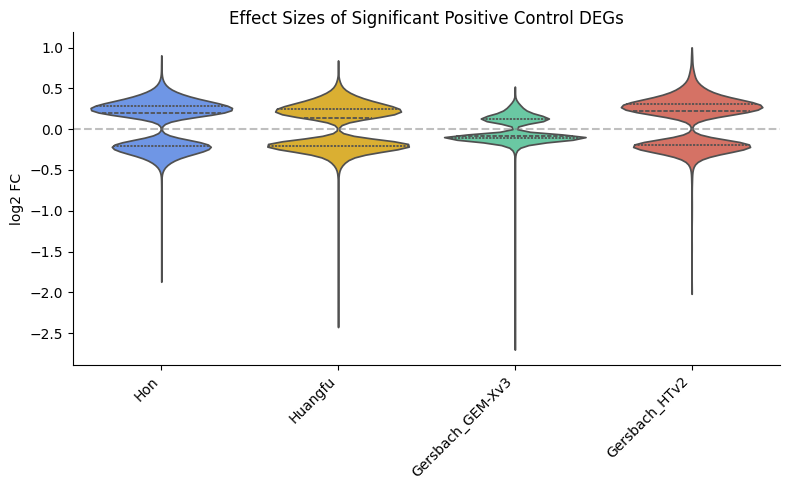

In [16]:
# Distribution of effect sizes for significant DEGs
if len(posctrl_sig) > 0:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.violinplot(
        data=posctrl_sig,
        x='dataset',
        y='log2_fc',
        order=dataset_order,
        palette=dataset_colors,
        inner='quartile',
        cut=0,
        ax=ax
    )

    ax.axhline(0, color='gray', linestyle='--', alpha=0.5)
    ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in dataset_order], rotation=45, ha='right')
    ax.set_ylabel('log2 FC')
    ax.set_xlabel('')
    ax.set_title('Effect Sizes of Significant Positive Control DEGs')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.savefig(OUTPUT_DIR / "posctrl_deg_effect_sizes.pdf", dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No significant positive control DEGs found")

## DEGs Normalized by Cell Count

In [17]:
# Load gene metrics to get cell counts
gene_metrics_list = []
for _, row in paths_df.iterrows():
    gene_path = Path(row['qc_dir']) / row['gene_metrics']
    if gene_path.exists():
        df = pd.read_csv(gene_path, sep="\t")
        df['dataset'] = row['dataset']
        gene_metrics_list.append(df)

gene_metrics_df = pd.concat(gene_metrics_list, ignore_index=True)
gene_all = gene_metrics_df[gene_metrics_df['batch'] == 'all'][['dataset', 'n_cells']].copy()
gene_all

,dataset,n_cells
0,Hon_WTC11-benchmark_TF-Perturb-seq,91866
5,Huangfu_WTC11-benchmark_TF-Perturb-seq,114470
10,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,264159
15,Gersbach_WTC11-benchmark_TF-Perturb-seq_HTv2,33938


In [18]:
# Merge cell counts with DEG counts
degs_summary = degs_per_guide.groupby(['dataset', 'label'])['n_degs'].agg(['sum', 'mean', 'median']).reset_index()
degs_summary.columns = ['dataset', 'label', 'total_degs', 'mean_degs', 'median_degs']
degs_summary = degs_summary.merge(gene_all, on='dataset')
degs_summary['degs_per_1000_cells'] = degs_summary['total_degs'] / degs_summary['n_cells'] * 1000
degs_summary

/var/folders/tm/f8q3_wcj5s98dwjv86bvq7hr0000gn/T/ipykernel_32639/322278869.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  degs_summary = degs_per_guide.groupby(['dataset', 'label'])['n_degs'].agg(['sum', 'mean', 'median']).reset_index()


,dataset,label,total_degs,mean_degs,median_degs,n_cells,degs_per_1000_cells
0,Hon_WTC11-benchmark_TF-Perturb-seq,negative_control,9893,183.203704,56.0,91866,107.689461
1,Hon_WTC11-benchmark_TF-Perturb-seq,non_targeting,8646,288.200000,71.0,91866,94.115342
2,Hon_WTC11-benchmark_TF-Perturb-seq,positive_control,7914,989.250000,1069.5,91866,86.147214
3,Hon_WTC11-benchmark_TF-Perturb-seq,tf_targeting,75891,234.231481,83.0,91866,826.105414
4,Huangfu_WTC11-benchmark_TF-Perturb-seq,negative_control,13249,245.351852,114.0,114470,115.742116
5,Huangfu_WTC11-benchmark_TF-Perturb-seq,non_targeting,3819,127.300000,58.0,114470,33.362453
6,Huangfu_WTC11-benchmark_TF-Perturb-seq,positive_control,6471,808.875000,815.0,114470,56.530095
7,Huangfu_WTC11-benchmark_TF-Perturb-seq,tf_targeting,62095,191.651235,68.5,114470,542.456539
8,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,negative_control,9367,173.462963,111.5,264159,35.459704
9,Gersbach_WTC11-benchmark_TF-Perturb-seq_GEM-Xv3,non_targeting,5444,181.466667,94.0,264159,20.608800


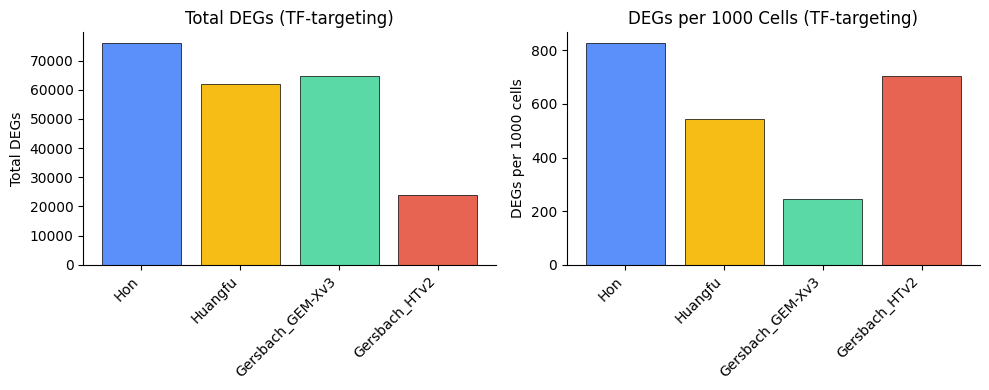

In [19]:
# Plot normalized DEGs for TF-targeting
tf_summary = degs_summary[degs_summary['label'] == 'tf_targeting'].copy()
tf_summary['dataset'] = pd.Categorical(tf_summary['dataset'], categories=dataset_order, ordered=True)
tf_summary = tf_summary.sort_values('dataset')

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Total DEGs
ax = axes[0]
colors = [dataset_colors.get(ds, 'gray') for ds in tf_summary['dataset']]
ax.bar(range(len(tf_summary)), tf_summary['total_degs'], color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(tf_summary)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in tf_summary['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('Total DEGs')
ax.set_title('Total DEGs (TF-targeting)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# DEGs per 1000 cells
ax = axes[1]
ax.bar(range(len(tf_summary)), tf_summary['degs_per_1000_cells'], color=colors, edgecolor='black', linewidth=0.5)
ax.set_xticks(range(len(tf_summary)))
ax.set_xticklabels([ds.replace('_WTC11-benchmark_TF-Perturb-seq', '') for ds in tf_summary['dataset']], 
                   rotation=45, ha='right')
ax.set_ylabel('DEGs per 1000 cells')
ax.set_title('DEGs per 1000 Cells (TF-targeting)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / "degs_normalized_comparison.pdf", dpi=300, bbox_inches='tight')
plt.show()

---
# DONE!